# This is a notebook with blank cells for you to run through an example dataset cleaning/analysis
- There are multiple ways to do a lot of these steps!
- I have included hints/pointers as comments in a few of the steps, in case you get stuck
- Our goal will be to extract the large data from a csv file, clean it as necessary, and get some summary statistics

### This dataset was taken from the NCBI Gene Expression Omnibus [here](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE82187). It was originally published in 2016 [here](https://www.cell.com/cell-reports/fulltext/S2211-1247(16)30813-0?_returnURL=https%3A%2F%2Flinkinghub.elsevier.com%2Fretrieve%2Fpii%2FS2211124716308130%3Fshowall%3Dtrue) and was one of the first studies to perform scRNAseq on a large number of cell types in the striatum of adult mice (at least as far as I can tell).

### I have already downloaded and extracted the .csv linked at the bottom of the GEO page, and changed a few things within excel that we can now practice cleaning up. It can be downloaded [here](https://github.com/bdev1238/symmetrical-broccoli). You will need to download that file from github and extract it to work with it.

### This is a gene expression matrix from this study, that includes partially-processed RNAseq data. Each row represents a cell, whereas each column represents a specific gene. Given this information, the excel file is HUGE, making this a perfect application for python! It is much faster and easier to read this into a dataframe and manipulate it that way.

-

-

-

-

## (1) Start by importing the necessary packages at the top of the notebook, these are almost always numpy and pandas

In [1]:
import numpy as np
import pandas as pd

## (2) Next, you are going to want to read the data into a pandas dataframe, and assign that dataframe a master variable name

- Do not worry if it takes a second, this is a large dataset, so on my computer it takes about 30s to load in.

In [47]:
%%time

df = pd.read_csv('H:\\DATA\\rna_seq_datasets\\adult_striatum\\gocke2016_taxonomy_mouse_striatum_GSE82187.csv')

Wall time: 12.5 s


## (3) Print out the first 5 rows of the dataframe you've just created. How does it look? Are there any notable columns?
- How big is the dataframe? You can use shape function to see how many rows and columns it contains.
- Any columns that we might want to rename?
    - try to keep everything lowercase and use_dashes_instead_of_space
- Any columns we may want to drop for simplicity?

In [4]:
df.head()

,Unnamed: 0,cell.name,type,experiment,protocol,0610005C13Rik,0610007C21Rik,0610007L01Rik,0610007N19Rik,0610007P08Rik,...,Xk,Xkr4,Xkr6,Xkr7,Xkr8,Xkrx,Xlr,Xlr3a,Xlr3b,Xlr3c
0,1,1-0-0-0-BTN22-C34-8ul-1,Neuron,BTN22,Mic-scRNA-Seq,0.0,0.000000,0.000000,0.0,0.000000,...,1.715036,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
1,2,1-0-0-0-BTN24-C29-18ul-IL5195-708-502,Neuron,BTN24,Mic-scRNA-Seq,0.0,1.828000,0.000000,0.0,1.751656,...,1.493253,0.000000,2.238984,0.0,0.000000,0.0,0.0,1.769819,0.0,0.0
2,3,1-0-0-0-BTN24-C59-22ul-IL5195-710-505,Neuron,BTN24,Mic-scRNA-Seq,0.0,2.016060,0.000000,0.0,0.000000,...,0.000000,0.552569,0.939896,0.0,1.141321,0.0,0.0,0.000000,0.0,0.0
3,4,1-0-0-0-BTN24-C70-12ul-IL5195-709-508,Neuron,BTN24,Mic-scRNA-Seq,0.0,2.547597,3.004959,0.0,0.000000,...,0.000000,0.000000,2.459365,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
4,5,1-0-0-0-BTN24-C76-8ul-IL5195-701-507,Neuron,BTN24,Mic-scRNA-Seq,0.0,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,1.434977,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0


In [5]:
df.shape

(1208, 16384)

In [8]:
df.rename(columns = {'type': 'cell_type'}, inplace = True)

In [10]:
df.drop(columns = ['Unnamed: 0', 'cell.name', 'experiment', 'protocol'], inplace = True)

In [11]:
df

,cell_type,0610005C13Rik,0610007C21Rik,0610007L01Rik,0610007N19Rik,0610007P08Rik,0610007P14Rik,0610007P22Rik,0610009B22Rik,0610009D07Rik,...,Xk,Xkr4,Xkr6,Xkr7,Xkr8,Xkrx,Xlr,Xlr3a,Xlr3b,Xlr3c
0,Neuron,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.715036,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0
1,Neuron,0.0,1.828000,0.000000,0.0,1.751656,1.702620,0.000000,1.988706,1.795714,...,1.493253,0.000000,2.238984,0.0,0.000000,0.0,0.0,1.769819,0.000000,0.0
2,Neuron,0.0,2.016060,0.000000,0.0,0.000000,2.047177,2.026682,1.426378,1.567832,...,0.000000,0.552569,0.939896,0.0,1.141321,0.0,0.0,0.000000,0.000000,0.0
3,Neuron,0.0,2.547597,3.004959,0.0,0.000000,2.258460,0.000000,1.949213,1.184524,...,0.000000,0.000000,2.459365,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0
4,Neuron,0.0,0.000000,0.000000,0.0,0.000000,1.727957,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.434977,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1203,Neuron,0.0,1.911050,0.000000,0.0,0.000000,1.682489,0.000000,1.799922,1.865884,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,2.290705,0.0
1204,Neuron,0.0,1.875535,2.183359,0.0,0.000000,0.326838,1.781684,0.000000,1.918759,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0
1205,Neuron,0.0,1.953439,1.340484,0.0,0.000000,2.183383,0.000000,1.373718,1.985880,...,0.000000,0.000000,0.794175,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0
1206,Neuron,0.0,1.407535,0.000000,0.0,0.000000,0.000000,1.170677,2.157596,1.750173,...,0.000000,0.000000,1.946892,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0


## (4) Rename and drop any columns that you may want to. This is personal preference, but can help moving forward.
- Here are a few potential functions that are useful for this purpose
    - [df.rename](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html)
    - [df.drop](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html)
- Reminder to reassign the outputs here to either the same df variable or a new variable! Also feel free to try out the "inplace" argument, see what it does!
   

In [12]:
df.head()

,cell_type,0610005C13Rik,0610007C21Rik,0610007L01Rik,0610007N19Rik,0610007P08Rik,0610007P14Rik,0610007P22Rik,0610009B22Rik,0610009D07Rik,...,Xk,Xkr4,Xkr6,Xkr7,Xkr8,Xkrx,Xlr,Xlr3a,Xlr3b,Xlr3c
0,Neuron,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.715036,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
1,Neuron,0.0,1.828000,0.000000,0.0,1.751656,1.702620,0.000000,1.988706,1.795714,...,1.493253,0.000000,2.238984,0.0,0.000000,0.0,0.0,1.769819,0.0,0.0
2,Neuron,0.0,2.016060,0.000000,0.0,0.000000,2.047177,2.026682,1.426378,1.567832,...,0.000000,0.552569,0.939896,0.0,1.141321,0.0,0.0,0.000000,0.0,0.0
3,Neuron,0.0,2.547597,3.004959,0.0,0.000000,2.258460,0.000000,1.949213,1.184524,...,0.000000,0.000000,2.459365,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
4,Neuron,0.0,0.000000,0.000000,0.0,0.000000,1.727957,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.434977,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0


## (5) Now that we have adequately cleaned columns, let's explore some of this data! We will probably want to sort by cell type, which is contained in one of the columns.
- There are a couple ways to do this:
    - One being the [sort_values function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html)
        - Try this one first!
    - Another being the [groupby function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html)
        - This one will come in a little bit later, but can be used at this step

In [16]:
df.sort_values(by = 'cell_type', inplace = True)

In [17]:
df

,cell_type,0610005C13Rik,0610007C21Rik,0610007L01Rik,0610007N19Rik,0610007P08Rik,0610007P14Rik,0610007P22Rik,0610009B22Rik,0610009D07Rik,...,Xk,Xkr4,Xkr6,Xkr7,Xkr8,Xkrx,Xlr,Xlr3a,Xlr3b,Xlr3c
452,Astro,0.0,0.000000,0.000000,0.000000,0.000000,1.478369,0.000000,0.000000,2.509454,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
483,Astro,0.0,2.091362,0.272858,0.000000,0.000000,0.272858,0.000000,0.000000,2.431861,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
482,Astro,0.0,0.000000,2.877645,0.000000,0.000000,2.480040,0.000000,0.282793,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
481,Astro,0.0,2.410681,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
480,Astro,0.0,1.712116,2.335117,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
697,Vascular,0.0,0.000000,0.000000,2.599855,0.000000,0.000000,0.000000,1.628133,1.628133,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
698,Vascular,0.0,2.956791,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.769931,...,0.0,0.0,0.0,0.0,0.0,0.000000,3.262186,0.0,0.0,0.0
685,Vascular,0.0,2.607427,0.000000,2.961458,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
567,Vascular,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.797684,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0


## (6) Get the [value_counts](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html) of the different cell types contained in this dataset.
- This will require indexing just the cell type column to pass that series to this function!

In [18]:
df['cell_type'].value_counts()

Neuron             836
Astro              106
Macrophage          71
Microglia           48
Vascular            43
Oligo               42
Ependy-Sec          21
Ependy-C            18
OPC                 13
NSC                  7
neuron               1
Oligodendrocyte      1
Astrocyte            1
Name: cell_type, dtype: int64

## (7) Hmmm. It seems that a few cell types are overlapping? Maybe they were misnamed? (I did this don't worry). We should rename those!!
- I believe it is for-loop time!
- Again, there are many ways to do this, but try to write the code in such a way that it is generalizable to any future datasets!

In [19]:
len(df)

1208

In [20]:
range(1208)

range(0, 1208)

In [21]:
range(len(df))

range(0, 1208)

In [24]:
##rename any df['cell_type'] values that may be slightly misspelled


#for loop/iterate through each row in our df, 
#check the value of that row at df['cell_type'] location, 
#and change it if it matches some abberant/incorrect/misspelled value

for i in range(len(df)):
    if df['cell_type'][i] == 'neuron':
        df['cell_type'][i] = 'Neuron'
    if df['cell_type'][i] == 'Oligodendrocyte':
        df['cell_type'][i] = 'Oligo'
    if df['cell_type'][i] == 'Astrocyte':
        df['cell_type'][i] = 'Astro'

D:\anaconda\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\anaconda\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [26]:
df['cell_type'].value_counts()

Neuron        837
Astro         107
Macrophage     71
Microglia      48
Oligo          43
Vascular       43
Ependy-Sec     21
Ependy-C       18
OPC            13
NSC             7
Name: cell_type, dtype: int64

## (8) Reprint the value counts to check whether you effectively removed the few stragglers!
- There should be 10 different types, you can quickly check this using np.unique().shape() on original cell type series!

In [27]:
df['cell_type'].value_counts()

Neuron        837
Astro         107
Macrophage     71
Microglia      48
Oligo          43
Vascular       43
Ependy-Sec     21
Ependy-C       18
OPC            13
NSC             7
Name: cell_type, dtype: int64

In [30]:
np.unique(df['cell_type']).shape

(10,)

In [34]:
df.sort_values(by = 'cell_type', inplace = True)

In [35]:
df

,cell_type,0610005C13Rik,0610007C21Rik,0610007L01Rik,0610007N19Rik,0610007P08Rik,0610007P14Rik,0610007P22Rik,0610009B22Rik,0610009D07Rik,...,Xk,Xkr4,Xkr6,Xkr7,Xkr8,Xkrx,Xlr,Xlr3a,Xlr3b,Xlr3c
452,Astro,0.0,0.000000,0.0000,0.000000,0.000000,1.478369,0.00000,0.000000,2.509454,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
17,Astro,0.0,1.729755,0.0000,0.000000,0.000000,0.000000,0.00000,0.000000,2.286133,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
8,Astro,0.0,1.750657,0.0000,0.000000,2.733919,1.408008,0.00000,1.700467,2.615762,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
9,Astro,0.0,2.204011,0.0000,0.000000,1.395221,1.291042,0.00000,1.291042,1.346248,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
10,Astro,0.0,0.000000,0.0000,0.000000,0.000000,0.000000,0.00000,0.000000,2.995111,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
641,Vascular,0.0,0.000000,0.0000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.506732,0.0,1.217003,0.0,0.0,0.0
605,Vascular,0.0,0.000000,0.0000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
586,Vascular,0.0,0.000000,0.0000,0.000000,0.000000,0.000000,0.00000,0.000000,2.205611,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
676,Vascular,0.0,2.136327,0.0000,2.406145,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0


## (9) Now that we have fixed the abberrant labels, we can appropriately group the data!!
- Our first question could be: what is the average (mean) gene expression of Shank3 in different cell types within the striatum?
    - Write a code (using the pandas groupby function) to answer this question

In [38]:
#group data by cell type
#average values contained within shank3 column

df.groupby(by = 'cell_type')['Shank3'].mean()

cell_type
Astro         0.017784
Ependy-C      0.078386
Ependy-Sec    0.000000
Macrophage    0.000000
Microglia     0.000000
NSC           0.066045
Neuron        0.424857
OPC           0.000000
Oligo         0.003485
Vascular      0.084623
Name: Shank3, dtype: float64

## We can repeat this code with any gene we might be interested in! Let's try Cx3cr1!

In [39]:
df.groupby(by = 'cell_type')['Cx3cr1'].mean()

cell_type
Astro         0.099325
Ependy-C      0.435508
Ependy-Sec    0.161002
Macrophage    0.899491
Microglia     3.601022
NSC           0.035178
Neuron        0.001254
OPC           0.305469
Oligo         0.446815
Vascular      0.052486
Name: Cx3cr1, dtype: float64

## (10) A quick way to visualize these quantities across groups is to plot them. Try appending the .plot() function onto the end of your groupby code and see what happens!
- In the publication, they distinguished various cell types based on their uniquely high expression of certain genes.
    - Which cell type are they able to distinguish using 'Ttr'?
    - What about 'Mog'?

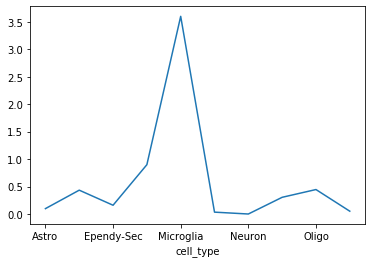

In [40]:
df.groupby(by = 'cell_type')['Cx3cr1'].mean().plot()

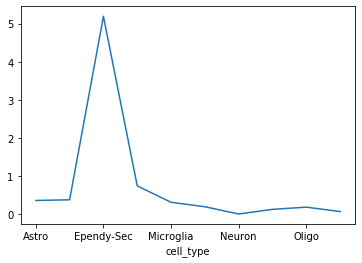

In [41]:
df.groupby(by = 'cell_type')['Ttr'].mean().plot()

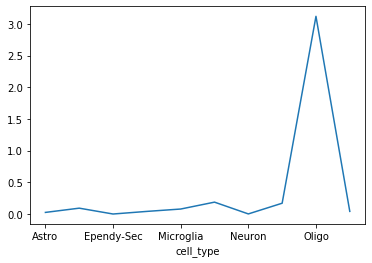

In [42]:
df.groupby(by = 'cell_type')['Mog'].mean().plot()

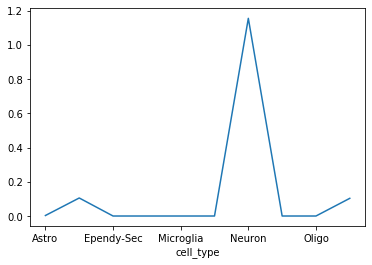

In [43]:
df.groupby(by = 'cell_type')['Il34'].mean().plot()

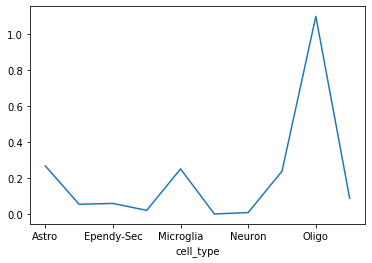

In [44]:
df.groupby(by = 'cell_type')['Csf1'].mean().plot()

D:\anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


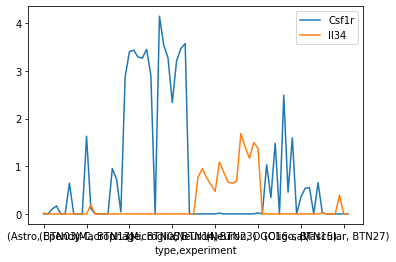

In [49]:
df.groupby(by = ['type', 'experiment'])['Csf1r', 'Il34'].mean().plot()

In [50]:
df.groupby(by = ['type', 'experiment'])['Csf1r', 'Il34'].mean()

D:\anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


Csf1r      Il34
type     experiment                    
Astro    BTN03       0.000000  0.017667
         BTN06       0.000000  0.000000
         BTN13       0.104372  0.000000
         BTN14       0.167217  0.000000
         BTN15       0.000000  0.000000
...                       ...       ...
Vascular BTN15       0.000000  0.000000
         BTN16       0.000000  0.000000
         BTN17       0.000000  0.391979
         BTN27       0.000000  0.000000
neuron   BTN35       0.000000  0.000000

[72 rows x 2 columns]

## (11) Hopefully this was helpful to work through and this example was able to demonstrate how getting your data to a clean dataframe format can allow for fast, exploratory analysis in many different dimensions!
- Please slack or bring any questions with you to our programming meeting next week!

If you are feeling particularly adventurous, you can try to implement this data within a [t-sne plot](https://towardsdatascience.com/visualising-high-dimensional-datasets-using-pca-and-t-sne-in-python-8ef87e7915b). I am going to try to get this tutorial to work with our example data, and will report back at the meeting next week if I'm successful!